In [15]:
import networkx as nx
import reduction
import simulate
import numpy as np
import matplotlib.pyplot as plt


def get_edge_labels_dic(G):
    edge_labels = {}
    for e in G.edges:
        edge_labels[e] = G.get_edge_data(e[0],e[1])['weight']    
    return edge_labels

def permute_timescales(G):
    edge_labels = get_edge_labels_dic(G)
    vals = list(edge_labels.values())
    perm = np.random.permutation(len(vals))
    for i,e in enumerate(edge_labels):
        edge_labels[e] = vals[perm[i]]
    nx.set_edge_attributes(G,edge_labels,'weight')
    
def plot_dynamics(G,title='',timescale=5,highlighted_node=None):
    X = np.zeros((len(G.edges),3)).astype(np.int32)
    node_names = []
    for n in G:
        node_names.append(n)
    node_names.sort()
    for i,e  in enumerate(G.edges):
        X[i,0] = node_names.index(e[0])
        X[i,1] = node_names.index(e[1])
        X[i,2] = G.get_edge_data(e[0],e[1])['weight']
    (t,XX) = simulate.simulate(X, timescale)
    #t0 = 0
    #tmax = 10**timescale
    #steps = XX.shape[0]
    #t = np.linspace(t0, tmax, steps)
    simulate.plot_trace(XX,logy=False,logx=True,labels=node_names,time=t)
    if not highlighted_node is None:
        irx = node_names.index(highlighted_node)
        plt.plot(t,XX[:,irx],'r-',linewidth=5)
    plt.title(title)

### We load the file containing the model from https://link.springer.com/chapter/10.1007/978-3-030-60327-4_3#Fig2
    

{('S1', 'S2'): -1, ('S2', 'S1'): -2, ('S2', 'S3'): -1, ('S3', 'S2'): -1, ('S3', 'S4'): -2, ('S4', 'S3'): -1}


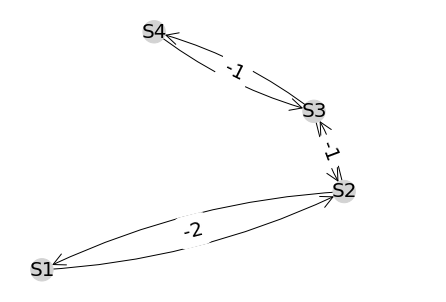

In [16]:
filename = 'models/petrov.csv'
reduced_filename = "%s_reduced" % filename
timescale = 5
G = reduction.load(filename)
node_names = []
for n in G:
    node_names.append(n)
color_map = []
for node in G:
    color_map.append('lightgray')
pos = nx.nx_pydot.graphviz_layout(G)
nx.draw(G, pos,with_labels = True,node_color=color_map,
        font_size=20,node_size=500,arrowsize=30,arrowstyle='->',
       connectionstyle="arc3,rad=0.1")
edge_labels = get_edge_labels_dic(G)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels,font_color='black',font_size=20)
edge_labels = get_edge_labels_dic(G)
print(edge_labels)
plt.show()


In [17]:
try:
    uG = reduction.reduce_graph(G)
    reduction.save_graph(uG, reduced_filename)
    nx.draw(uG, pos, with_labels = True,node_color=color_map,font_size=20,node_size=500,arrowsize=30,arrowstyle='->')
    edge_labels = get_edge_labels_dic(uG)
    nx.draw_networkx_edge_labels(uG,pos,edge_labels=edge_labels,font_color='black',font_size=20)
    plt.show()
except:
    print('ERROR: Error in reduction!')

Duplicated best edge
ERROR: Error in reduction!
